# Unit 5 - Financial Planning

In [77]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from datetime import datetime       # Import datetime function
from datetime import timedelta      # Import timedelta function

from MCForecastTools import MCSimulation

%matplotlib inline

In [78]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [79]:
# Set current amount of crypto assets
my_btc = 1.2   # Number of Bitcoins currently held
my_eth = 5.3   # Number of Etherium currently held

In [80]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [81]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")     # Show the current BTC holding with value formatted with the thousands separator and 2 decimal places
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")     # Show the current ETH holding with value formatted with the thousands separator and 2 decimal places

# Acknowledgement https://docs.python.org/3/library/string.html#formatspec
# Please also refer to the end for an alternate solution.

The current value of your 1.2 BTC is $43,620.89
The current value of your 5.3 ETH is $11,500.64


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [82]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [83]:
# Set Alpaca API key and secret
alpaca_api_key = os.environ.get('ALPACA_API_KEY')        # Fetch the api key from the .env file
alpaca_secret_key = os.environ.get('ALPACA_SECRET_KEY')  # Fetch the secret key from the .env file

# Set the Alpaca API version
alpaca_api_version = "v2"

# Set the base URL to Alpaca Market's trading environment.
# Could have read this from the .env file but Bootcamp's AlpacaMarkets_Installation-Guide.md in the 05-APIs/Supplemental folder setup instructions don't mention setting this up.
# According to https://github.com/alpacahq/alpaca-trade-api-python/#alpaca-environment-variables the default is the live site, so to be safe even though we are just fetchting prices, we
# hard code the base url to the paper trading site.
alpaca_base_url = "https://paper-api.alpaca.markets"     # Set the base url to Alpaca's paper trading environment

# Create the Alpaca API object
alpaca_api = tradeapi.REST(key_id=alpaca_api_key, secret_key=alpaca_secret_key, base_url=alpaca_base_url, api_version=alpaca_api_version)

In [84]:
type(alpaca_api)

alpaca_trade_api.rest.REST

In [85]:
# Format current date as ISO format
# today = pd.Timestamp.now(tz="America/New_York").isoformat()       # Get current date (see note below)

##################################################################################################
# NOTE TO ASSESSOR:
# Alpaca returned the following error when trying to retrieve the prices for the current date:
#    "APIError: your subscription does not permit querying data from the past 15 minutes"
#
# Despite the error message the delayed time frame specified in the alpaca_api.get_bars request
# needs to be at least 12 hours, not 15 minutes.
# To overcome the above error and service restrictions, I opted for 1 day old data.
##################################################################################################

# Calculate yesterday's date as of midnight by getting the current datetime, subtracting 1 day,
# normalising to midnight and then formatting into iso format
yesterday = (pd.Timestamp.now( tz="America/New_York") + timedelta(days=-1)).normalize().isoformat()
  
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# 4. Get the current closing prices for `SPY` and `AGG` using Alpaca's `get_bars()` function.
# Transform the function's response to a Pandas DataFrame and preview the data.

# Get current closing prices for SPY and AGG
df_portfolio = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = yesterday,
    end = yesterday
).df

# Display sample data
df_portfolio

open      high     low   close    volume  \
timestamp                                                               
2023-09-20 04:00:00+00:00   95.57   95.6981   95.30   95.30   6282734   
2023-09-20 04:00:00+00:00  444.01  444.4350  438.43  438.64  82561441   

                           trade_count        vwap symbol  
timestamp                                                  
2023-09-20 04:00:00+00:00        25940   95.524275    AGG  
2023-09-20 04:00:00+00:00       507716  441.432105    SPY

# Note to Assessor 
The following instructions originally in the starter file seem to be inconsistent with steps 4 and 5 of the original README.md briefing.   
As such these have been ignored as there is no need to reorganise the data frame in order to fetch the current prices.

In [86]:
# Reorganize the DataFrame
# Separate ticker data
#### SEE NOTE ABOVE  ####
# Concatenate the ticker DataFrames

In [87]:
# 5. Pick the `SPY` and `AGG` close prices from the Alpaca's `get_bars()` DataFrame response and store them as Python variables.
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio[df_portfolio["symbol"] == "SPY"]["close"])
agg_close_price = float(df_portfolio[df_portfolio["symbol"] == "AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.3
Current SPY closing price: $438.64


In [88]:
# 6. Compute the value in dollars of the current amount of shares and print the results.
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $21,932.00
The current value of your 200 AGG shares is $19,060.00


### Savings Health Analysis

In [89]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_spy_value + my_agg_value
total_shares_value = my_btc_value + my_eth_value

# Create savings DataFrame
df_savings = pd.DataFrame([total_crypto_value, total_shares_value], index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

amount
crypto  40992.000000
shares  55121.531465

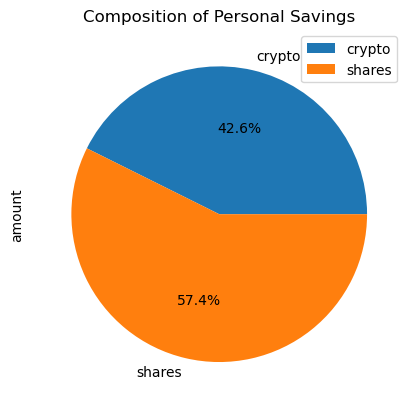

In [98]:
# Plot savings pie chart
savings_figure  = df_savings.plot.pie( y="amount", autopct = "%1.1f%%" , title = "Composition of Personal Savings" )


In [99]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings_amount = total_crypto_value + total_shares_value

# Validate saving health
if total_savings_amount > emergency_fund:                                # Check if total savings exceeds emergency fund, if so congratulate for exceeding
    display( "Congratulations on exceeding your financial goal!" )
    
if total_savings_amount == emergency_fund:                               # Check if total savings equals emergency fund, if so congratulate for reaching
    display( "Congratulations on reaching your financial goal!" )

if  total_savings_amount < emergency_fund:                               # Check if total savings are less than emergency fund, if so inform how much left to go
    amount_left = emergency_fund - total_savings_amount
    display( f"You need ${amount_left:0,.2f} to reach your financial goal." )
    
# Alternatively could have used if, elif, else

'Congratulations on exceeding your financial goal!'

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [100]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [102]:
# Get 5 years' worth of historical data for SPY and AGG
df_5y_historical_data = alpaca_api.get_bars( tickers, timeframe, start = start_date, end = end_date ).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_5y_historical_data[df_5y_historical_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_5y_historical_data[df_5y_historical_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_5y_portfolio = pd.concat([AGG, SPY],axis=1, keys=["AGG","SPY"])

# Display sample data
df_5y_portfolio.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [105]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
forecast_years = 30  #set the forecast years to the required amount

MC_sim = MCSimulation(
    portfolio_data = df_5y_portfolio,
    weights = [ 0.40, 0.60 ],    # Set weighting to 40% bonds (AGG) and 60% stocks (SPY)
    num_simulation = 500,
    num_trading_days = 252 * forecast_years
)

In [110]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [111]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\brusi\Projects\BC-assignments\module_05_homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1          2         3          4          5    \
0     1.000000   1.000000   1.000000  1.000000   1.000000   1.000000   
1     0.992667   1.005128   1.006463  0.999946   1.004957   0.992464   
2     0.988917   1.007269   1.000023  1.015361   1.012511   0.983544   
3     0.987481   1.008398   0.996689  1.013640   1.025523   0.996703   
4     0.991359   0.999717   0.989923  1.010612   1.025442   0.997312   
...        ...        ...        ...       ...        ...        ...   
7556  3.608269  19.054568  16.558978  4.844094  54.997195  32.023503   
7557  3.611444  19.009648  16.694504  4.776479  54.942138  32.348299   
7558  3.631066  19.146672  16.557751  4.777131  54.405706  31.936142   
7559  3.638372  19.056123  16.748462  4.756442  54.406789  31.660870   
7560  3.676475  19.161203  16.618979  4.714995  54.119888  32.047190   

            6         7          8         9    ...        490       491  \
0      1.000000  1.000000   1.000000  1.000000  ...   1.000000  1.000000   
1      0.994383  1.004432   0.999666  1.003318  ...   0.998942  1.003947   
2      1.004179  0.999345   1.007341  1.003308  ...   0.997701  1.008966   
3      0.999096  0.998443   1.001804  1.014333  ...   0.994951  1.010356   
4      0.996511  1.007625   1.004968  1.017431  ...   0.989962  1.008786   
...         ...       ...        ...       ...  ...        ...       ...   
7556  54.819134  8.582592  10.358295  6.948230  ...  23.587263  6.380215   
7557  54.792303  8.596072  10.298444  6.914919  ...  23.352619  6.336417   
7558  54.940485  8.617181  10.333669  6.907873  ...  23.632986  6.361158   
7559  54.873220  8.613007  10.303355  6.959145  ...  23.890051  6.344703   
7560  54.886469  8.669592  10.308929  7.035420  ...  23.927644  6.333531   

           492       493        494        495        496        497  \
0     1.000000  1.000000   1.000000   1.000000   1.000000   1.000000   
1     1.001717  0.999512   0.992680   1.001691   1.015583   1.000754   
2     0.993225  0.989548   0.993195   0.973422   1.010642   1.004798   
3     1.006590  0.974370   0.999502   0.968039   1.007182   1.004613   
4     1.006560  0.972098   0.999768   0.970062   1.013129   1.007907   
...        ...       ...        ...        ...        ...        ...   
7556  3.896871  4.858136  25.908113  13.881582  46.939626  10.817595   
7557  3.903980  4.804385  26.075214  13.677626  46.947573  10.706582   
7558  3.931493  4.823917  26.265615  13.771303  47.351071  10.568561   
7559  3.944562  4.848686  26.052296  13.522069  47.432293  10.568080   
7560  3.947193  4.895078  25.822396  13.591943  48.030570  10.544581   

            498        499  
0      1.000000   1.000000  
1      1.007233   0.995367  
2      1.025058   0.998398  
3      1.018061   0.996926  
4      1.030027   0.988882  
...         ...        ...  
7556  26.391564  36.914782  
7557  26.310095  36.808398  
7558  26.695313  36.590418  
7559  26.848241  36.505810  
7560  26.721480  36.653074  

[7561 rows x 500 columns]

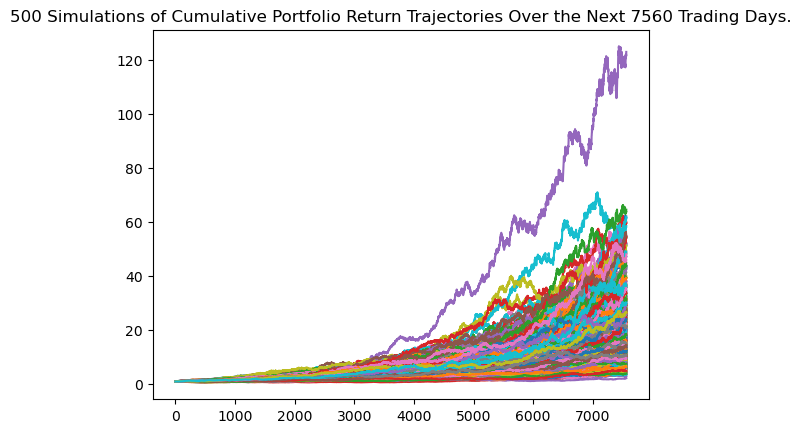

In [112]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

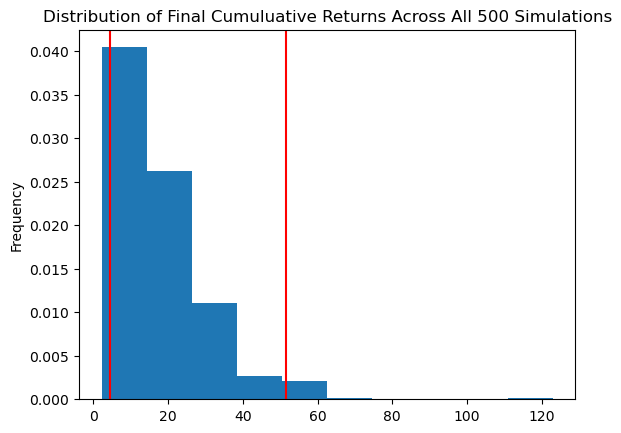

In [113]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

---

# Alternate solution using a dictionary for "Collect Crypto Prices Using the requests Library"

In [ ]:
# Alternate solution using a dictionary

# Define a dictionary for my portfolio
# the dictionary's schema is:
#    "integer": {              Unique index number E.g. 0
#        "name": "string",     Coin long name E.g. Bitcoin (as per alternative.me naming convention https://alternative.me/crypto/api/)
#        "symbol": "string",   Coin ticker symbol E.g. BTC
#        "coin_id": "integer", Coin's identifier on alternative.me. Eg. 1027 for etherium
#        "holding": "float"      Quantity of coin currently held in my portfolio
#    },

my_portfolio = {
    "0": {
        "name": "Bitcoin",
        "symbol": "BTC",
        "coin_id": 1,
        "holding": "1.2"
    },
    "1": {
        "name": "Ethereum",
        "symbol": "ETH",
        "coin_id": 1027,
        "holding": "5.3"
    }
}

preferred_currency_code = "CAD"   # Set the preferred currency code to fetch from alternative.me

In [ ]:
my_portfolio

In [ ]:
total_portfolio_value = 0 # initialise the total portfolio value

for coin in my_portfolio:
    # Get the coin details from my portfolio dictionary
    coin_name = my_portfolio[coin]["name"]
    coin_symbol = my_portfolio[coin]["symbol"]
    coin_id = str(my_portfolio[coin]["coin_id"])
    coin_holding = float(my_portfolio[coin]["holding"])

    url = f"https://api.alternative.me/v2/ticker/{coin_name}/?convert={preferred_currency_code}"  # build the url with the coin name and desired currency code
    coin_data = requests.get(url).json()  # fetch the pricing data
    
    coin_price = float(coin_data["data"][coin_id]["quotes"][preferred_currency_code]["price"])   # Convert the coin price into a float
    coin_value = coin_price * coin_holding     # Muliply the current coin price by our holding of the coin to get the value
    total_portfolio_value += coin_value        # Add the value of the current coin to the total portfolio value

    time_stamp = coin_data["metadata"]["timestamp"]    # Additional information - grab the timestamp from the feed data which is in Unix epoch in seconds (eg 1544129220 )  
    date_time = datetime.fromtimestamp(time_stamp)     # ...and convert it to a human readable format
    
    # Show the date and time when the coin price was applicable, the coin name, symbol and holding value based on how many coins we have in the portfolio.
    # ...formatting the value with the thousands separator and 2 decimal places  
    print(f"The current value (as at {date_time}) of your {coin_name} ({coin_symbol}) in {preferred_currency_code} is ${coin_value:0,.2f}")

print(f"The current total value of your portfolio in {preferred_currency_code} is ${total_portfolio_value:0,.2f}")    